<a href="https://colab.research.google.com/github/MrF1yn/house_price_prediction_model/blob/main/house_price_pred_gdscml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [ ]:
dataset = pd.read_csv("/content/housing.csv")

In [ ]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
x=dataset.drop(['median_house_value'], axis=1)
y=dataset['median_house_value']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

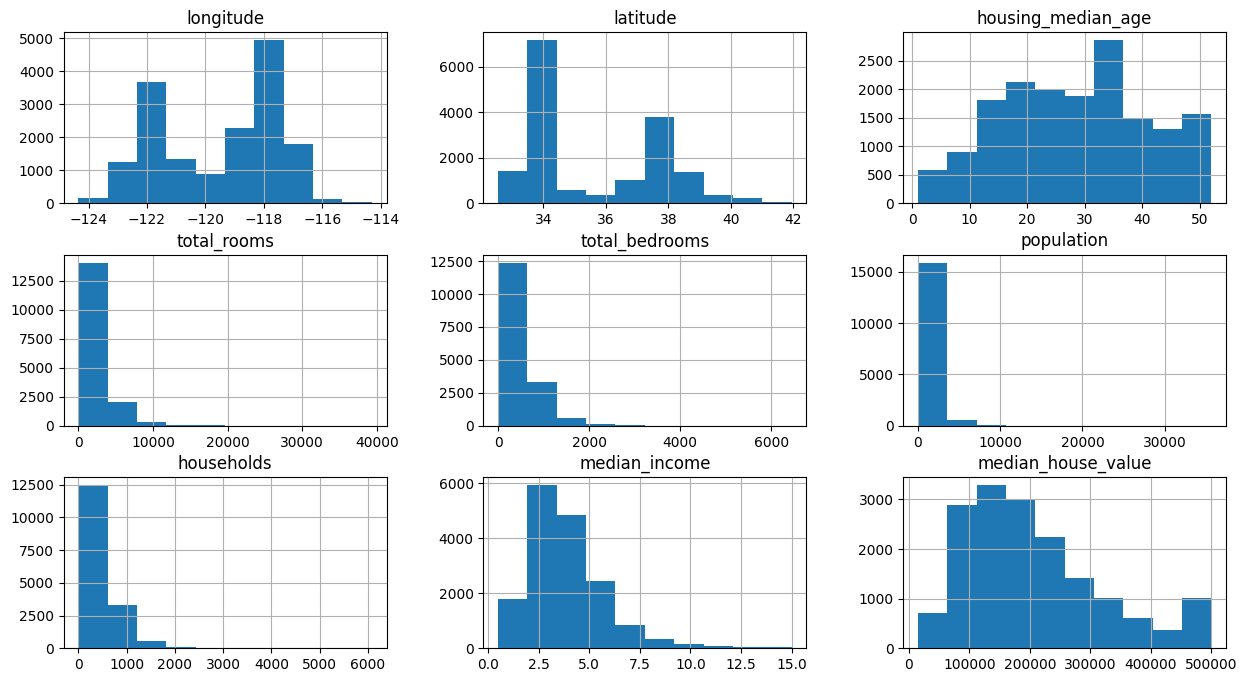

In [ ]:
train_dataset=x_train.join(y_train)
train_dataset.hist(figsize=(15,8))

<ipython-input-11-5c641ec5974a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_dataset.corr(), annot=True, cmap="YlOrRd")


<Axes: >

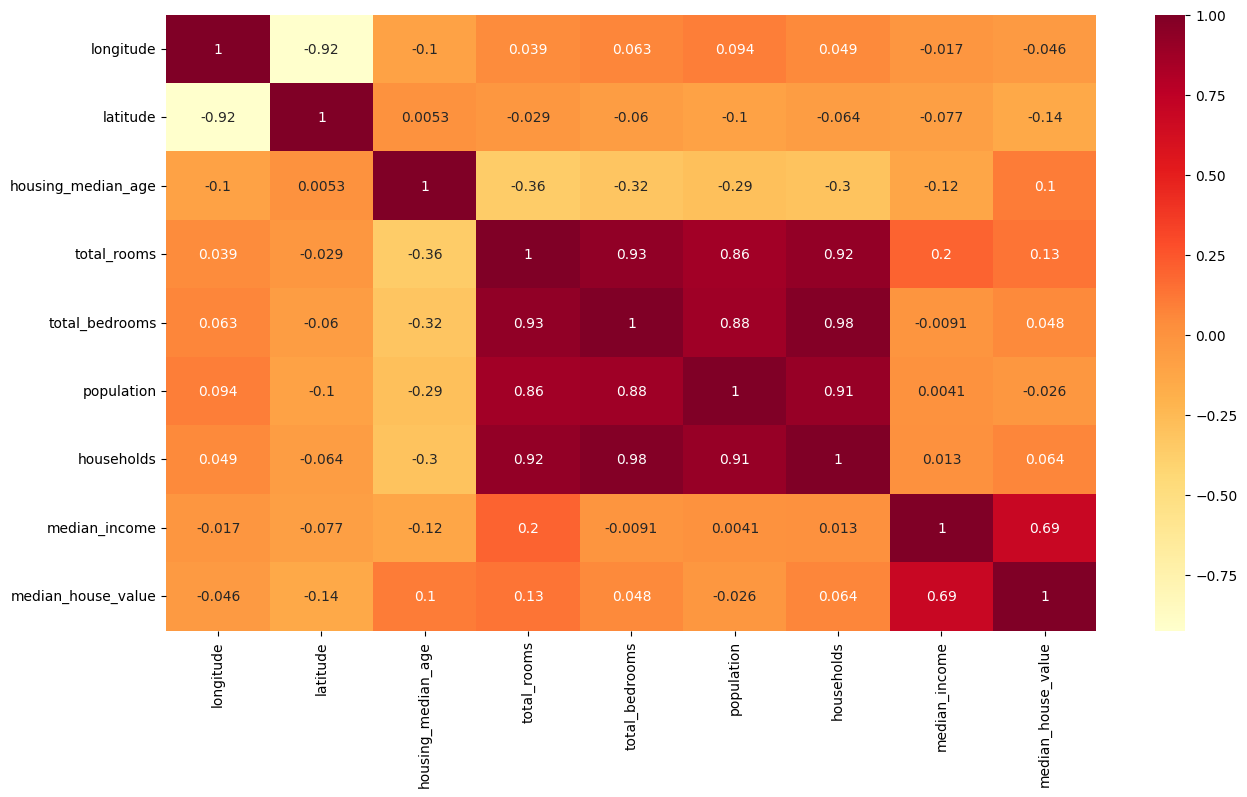

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_dataset.corr(), annot=True, cmap="YlOrRd")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

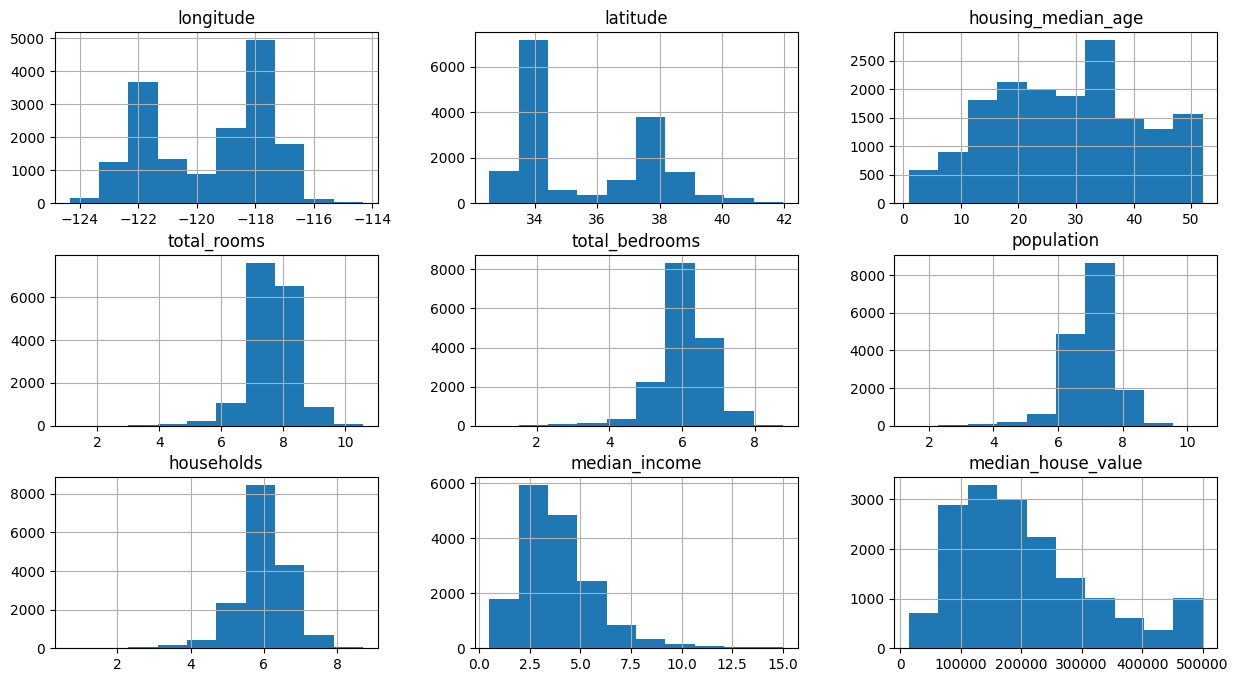

In [ ]:
train_dataset['total_rooms']=np.log(train_dataset['total_rooms']+1)
train_dataset['total_bedrooms']=np.log(train_dataset['total_bedrooms']+1)
train_dataset['population']=np.log(train_dataset['population']+1)
train_dataset['households']=np.log(train_dataset['households']+1)
train_dataset.hist(figsize=(15,8))

In [ ]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
train_dataset=train_dataset.join(pd.get_dummies(train_dataset.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,8.047829,6.442540,7.741099,6.436150,3.2596,103000.0,0,0,0,0,1
8267,-118.16,33.77,49.0,8.126518,6.669498,7.181592,6.629363,3.8125,382100.0,0,0,0,0,1
17445,-120.48,34.66,4.0,7.548556,5.805135,6.820016,5.820083,4.1563,172600.0,0,0,0,0,1
14265,-117.11,32.69,36.0,7.259820,5.908083,7.257708,5.874931,1.9425,93400.0,0,0,0,0,1
2271,-119.80,36.78,43.0,7.776115,6.068426,6.774224,5.942799,3.5542,96500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,7.193686,5.308268,6.490724,5.384495,6.3700,229200.0,1,0,0,0,0
11964,-117.43,34.02,33.0,8.034307,6.347389,7.469654,6.109248,3.0500,97800.0,0,1,0,0,0
5390,-118.38,34.03,36.0,7.650645,6.345636,7.471363,6.269096,2.9344,222100.0,1,0,0,0,0
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,283500.0,1,0,0,0,0


<Axes: >

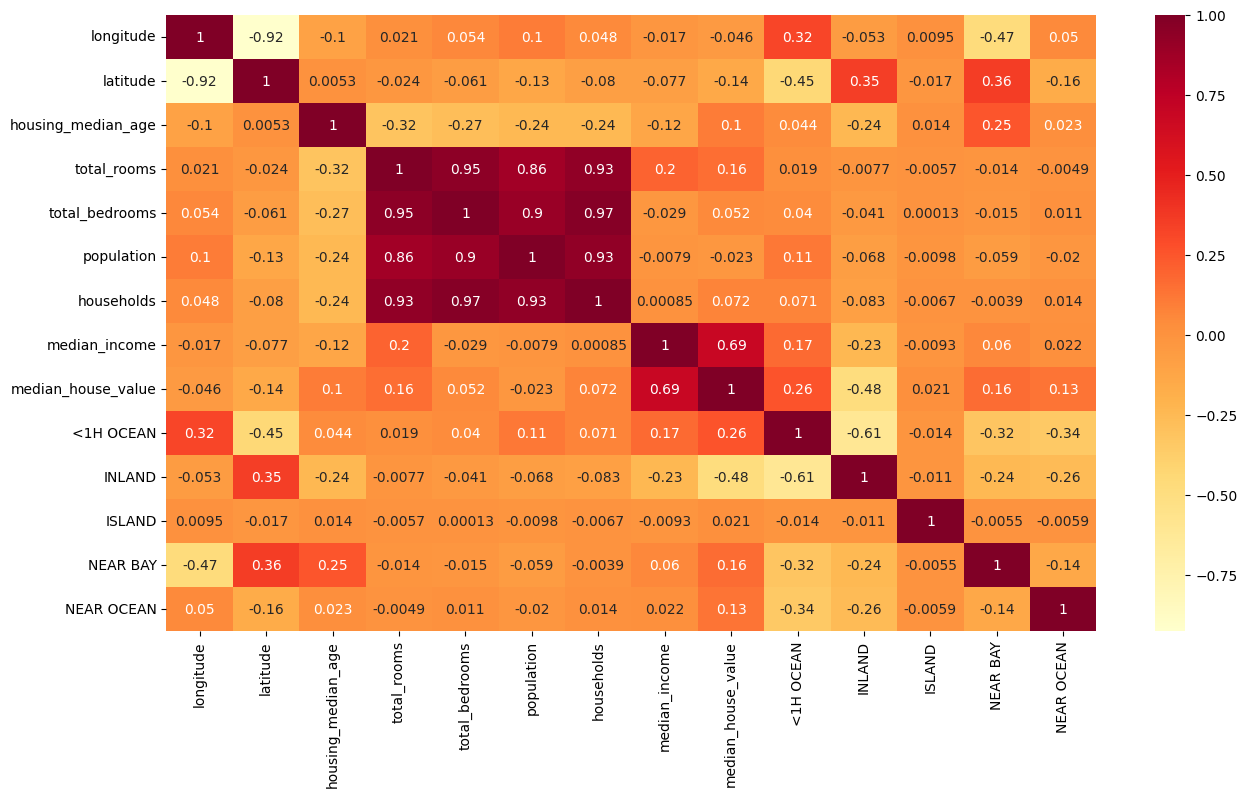

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_dataset.corr(), annot=True, cmap="YlOrRd")

In [ ]:
train_dataset['bedroom_ratio']=train_dataset['total_bedrooms'] / train_dataset['total_rooms']
train_dataset['household_rooms']=train_dataset['total_rooms'] / train_dataset['households']

<Axes: >

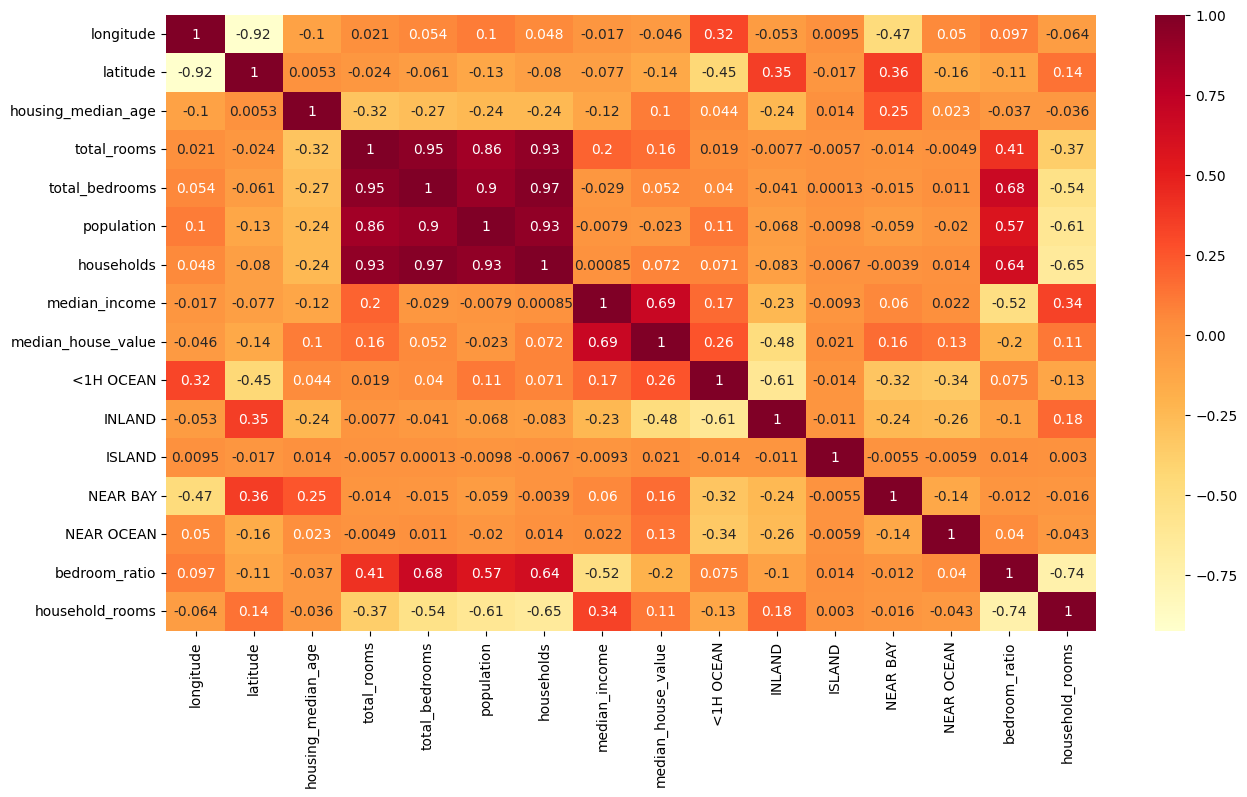

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_dataset.corr(), annot=True, cmap="YlOrRd")

In [ ]:
test_dataset=x_test.join(y_test)

test_dataset['total_rooms']=np.log(test_dataset['total_rooms']+1)
test_dataset['total_bedrooms']=np.log(test_dataset['total_bedrooms']+1)
test_dataset['population']=np.log(test_dataset['population']+1)
test_dataset['households']=np.log(test_dataset['households']+1)

test_dataset=test_dataset.join(pd.get_dummies(test_dataset.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_dataset

test_dataset['bedroom_ratio']=test_dataset['total_bedrooms'] / test_dataset['total_rooms']
test_dataset['household_rooms']=test_dataset['total_rooms'] / test_dataset['households']

In [ ]:
test_dataset.dropna(inplace=True)
x_test, y_test=test_dataset.drop(['median_house_value'], axis=1), test_dataset['median_house_value']
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 9658 to 3665
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3921 non-null   float64
 1   latitude            3921 non-null   float64
 2   housing_median_age  3921 non-null   float64
 3   total_rooms         3921 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          3921 non-null   float64
 6   households          3921 non-null   float64
 7   median_income       3921 non-null   float64
 8   median_house_value  3921 non-null   float64
 9   <1H OCEAN           3921 non-null   uint8  
 10  INLAND              3921 non-null   uint8  
 11  ISLAND              3921 non-null   uint8  
 12  NEAR BAY            3921 non-null   uint8  
 13  NEAR OCEAN          3921 non-null   uint8  
 14  bedroom_ratio       3921 non-null   float64
 15  household_rooms     3921 non-null   float64
dtypes: 

In [ ]:
x, y = train_dataset.drop(['median_house_value'], axis = 1), train_dataset['median_house_value']

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [ ]:
accuracy = reg.score(x_test, y_test)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.66


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(2)
reg.fit(x, y)
print(f"Accuracy:{reg.score(x,y)}")
#

Accuracy:0.8796118545442185
